# STEPS IN IMPLEMENTING LINEAR REGRESSION MODEL

1. Importing libraries and the dataset.
2. Scaling the dataset.
3. Checking for Multicollinearity and removing it.
4. Creating test and train partitions.
5. Implementing the Linear Regression model using Scikit Learn.
6. Generating predictions over the test set.
7. Evaluating the model.
8. Plotting the residuals.
9. Verifying the asumptions of linear regression model.
10. Vizualizing the coefficients to interpret the model results.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

# IMPORTING PREPROCESSED DATASET

In [2]:
data = pd.read_csv("Transformed Housing Data.csv")
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


# SCALING THE DATASET

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)

# CHECKING FOR MULTICOLLINEARITY AND REMOVING IT


<AxesSubplot:>

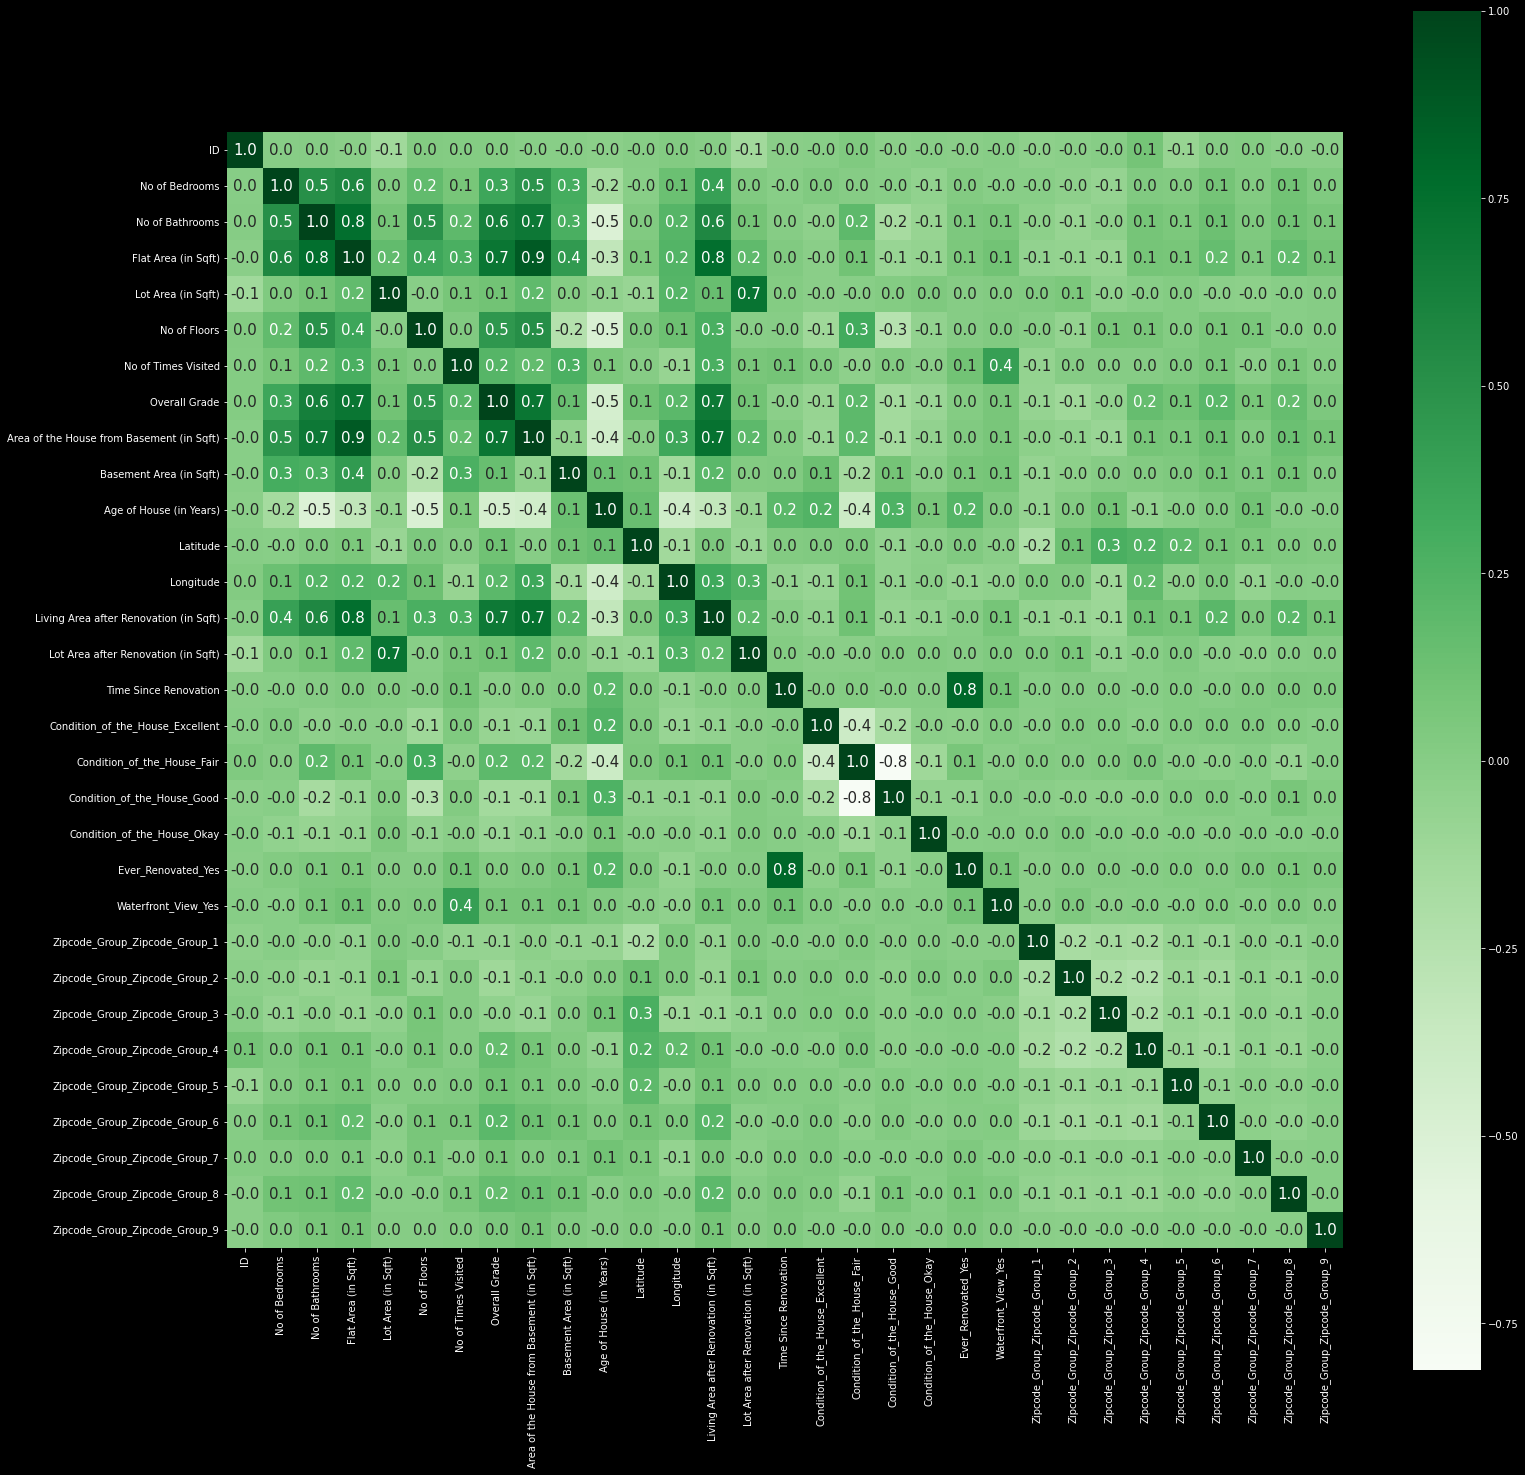

In [4]:
k = X.corr()
plt.figure(figsize=(25,25))
sns.heatmap(k, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [5]:
# pair of independent variables with correlation greater than 0.5
z = [[str(i), str(j)] for i in k.columns for j in k.columns if(k.loc[i,j] > abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [6]:
# importing Variance_inflation_Factor from Statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

# calculating vif for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range (vif_data.shape[1])], index=vif_data.columns)
VIF, len(VIF)

(ID                                              1.041820
 No of Bedrooms                                  1.639470
 No of Bathrooms                                 3.374993
 Flat Area (in Sqft)                          1481.788910
 Lot Area (in Sqft)                              2.113686
 No of Floors                                    2.127787
 No of Times Visited                             1.433488
 Overall Grade                                   2.968420
 Area of the House from Basement (in Sqft)    1205.625693
 Basement Area (in Sqft)                       345.489923
 Age of House (in Years)                         2.629593
 Latitude                                        2.471731
 Longitude                                       1.675652
 Living Area after Renovation (in Sqft)          3.068170
 Lot Area after Renovation (in Sqft)             2.154157
 Time Since Renovation                           2.788098
 Condition_of_the_House_Excellent               53.579546
 Condition_of_

In [7]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [8]:
def mc_remover(data):
    VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range (vif_data.shape[1])], index=vif_data.columns)
    if VIF.max() > 5:
        print(VIF[VIF == VIF.max()].index[0]+' has been removed')
        data = data.drop(columns=[VIF[VIF == VIF.max()].index[0]])
        return data
    else:
        print('No Multicollinearity present anymore')
        return data
for i in range(7):
    vif_data = mc_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,ID,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,0.885986,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,0.637358,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,0.365299,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,-0.727767,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.912987,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [9]:
#VIF of remaining colums
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range (vif_data.shape[1])], index=vif_data.columns)
VIF, len(vif_data.columns)

(ID                                           1.041731
 No of Bedrooms                               1.638990
 No of Bathrooms                              3.373806
 Lot Area (in Sqft)                           2.113093
 No of Floors                                 2.127703
 No of Times Visited                          1.433467
 Overall Grade                                2.957909
 Area of the House from Basement (in Sqft)    4.580370
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626561
 Latitude                                     2.471632
 Longitude                                    1.675626
 Living Area after Renovation (in Sqft)       3.063913
 Lot Area after Renovation (in Sqft)          2.153890
 Time Since Renovation                        2.788064
 Condition_of_the_House_Excellent             1.206624
 Condition_of_the_House_Good                  1.251983
 Condition_of_the_House_Okay                  1.025426
 Ever_Reno

# TRAIN TEST SET

In [10]:
X=data.drop(columns=['Sale_Price','Flat Area (in Sqft)','Condition_of_the_House_Fair','ID'])
Y=data['Sale_Price']
X

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,5650.0,1.0,0,7,1180.0,0,63,47.5112,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,7242.0,2.0,0,7,2170.0,400,67,47.7210,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,10000.0,1.0,0,6,770.0,0,85,47.7379,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,5000.0,1.0,0,7,1050.0,910,53,47.5208,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,8080.0,1.0,0,8,1680.0,0,31,47.6168,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,3,2.50,1131.0,3.0,0,8,1530.0,0,9,47.6993,...,0,0,0,1,0,0,0,0,0,0
21605,4,2.50,5813.0,2.0,0,8,2310.0,0,4,47.5107,...,0,1,0,0,0,0,0,0,0,0
21606,2,0.75,1350.0,2.0,0,7,1020.0,0,9,47.5944,...,0,0,0,1,0,0,0,0,0,0
21607,3,2.50,2388.0,2.0,0,8,1600.0,0,14,47.5345,...,0,0,0,0,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=101)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

# LINEAR REGRESSION

In [12]:
from sklearn.linear_model import LinearRegression #We need not write our own gradient descent code
lr = LinearRegression(normalize = True)
lr.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [13]:
lr.coef_

array([-4.22484806e+03,  1.56197572e+04,  3.61324897e-01,  4.99642270e+03,
        3.55187724e+04,  5.42431325e+04,  9.74660136e+01,  6.26570863e+01,
        9.48975134e+02,  1.54434622e+05, -1.69385790e+05,  2.61788196e+01,
       -1.06093843e-01, -1.92803708e+03,  5.28760450e+04,  1.15782476e+04,
       -2.58453874e+04,  7.25125655e+04,  1.24380250e+05,  3.89756936e+04,
        8.65066069e+04,  1.77334131e+05,  2.08096795e+05,  2.47765650e+05,
        2.75760772e+05,  3.62142679e+05,  4.10586696e+05,  4.60254184e+05])

# PREDICTIONS OVER TEST DATASET

In [14]:
predtest=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,predtest)

0.8461987715586197

In [15]:
predtrain=lr.predict(X_train)
from sklearn.metrics import r2_score
r2_score(Y_train,predtrain)

0.8412406591458191

# ASSUMPTIONS
# 1. RESIDUALS

In [16]:
residuals = predtest - Y_test
residual_table = pd.DataFrame({'residuals':residuals,'predictions':predtest})
residual_table = residual_table.sort_values(by='predictions')

In [17]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

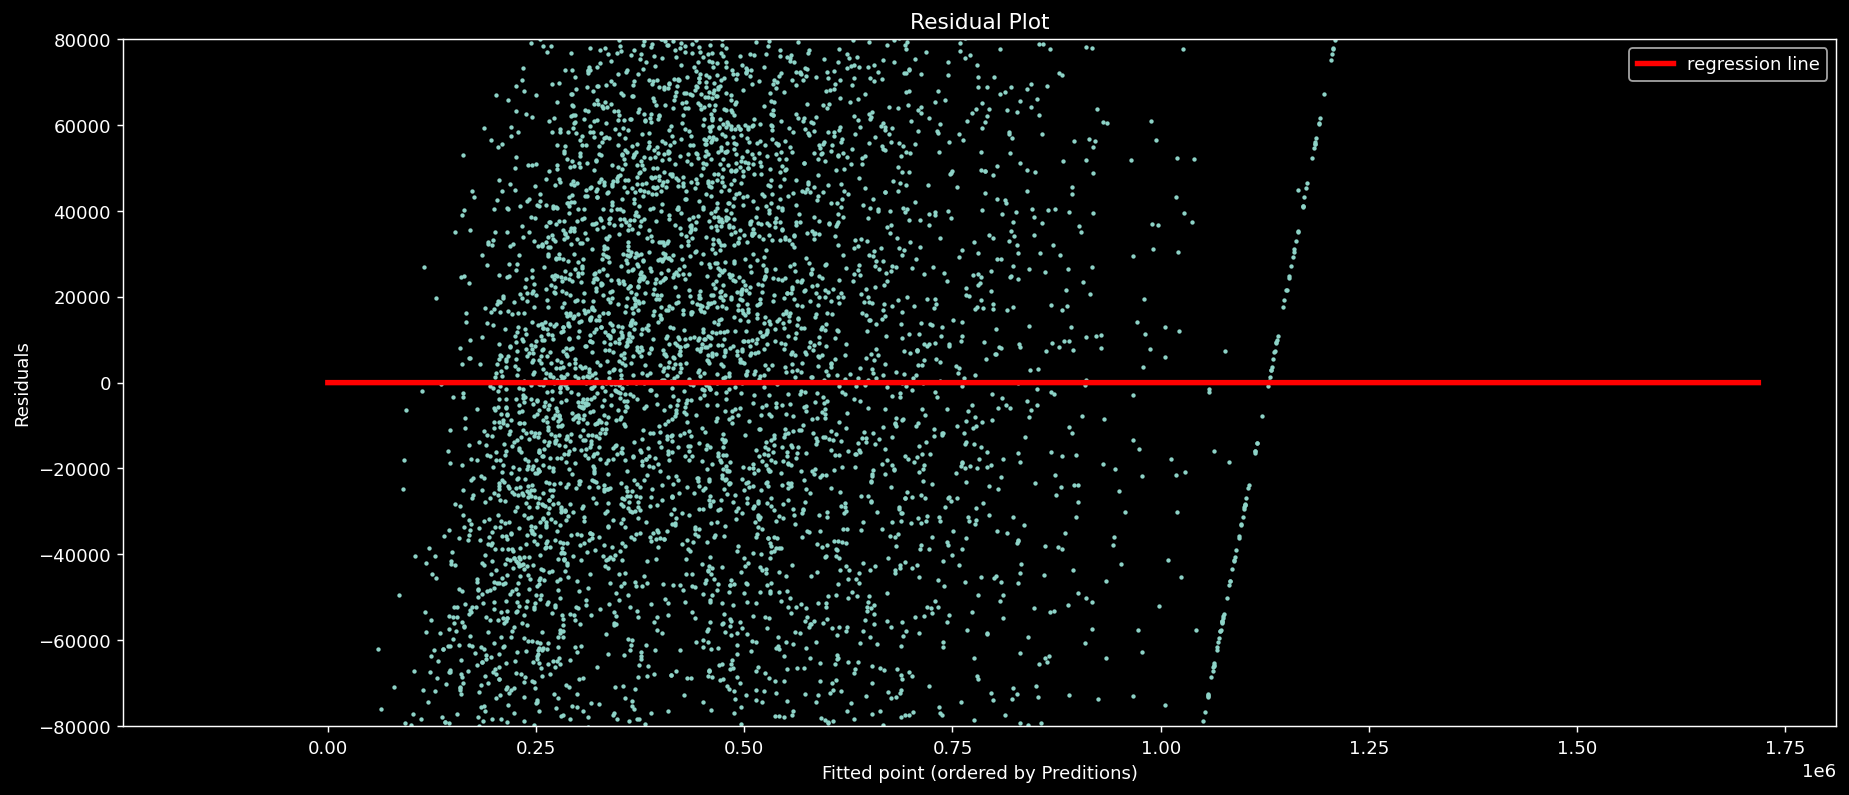

In [18]:
plt.figure(dpi=130, figsize=(17,7))

plt.scatter(residual_table['predictions'],residual_table['residuals'],s=2)
plt.plot(z,k,color='red',linewidth=3, label='regression line')
plt.ylim(-80000,80000)
plt.xlabel('Fitted point (ordered by Preditions)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()

# 2. DISTRIBUTION OF ERROR

Text(0.5, 1.0, 'Distribution of Residual')

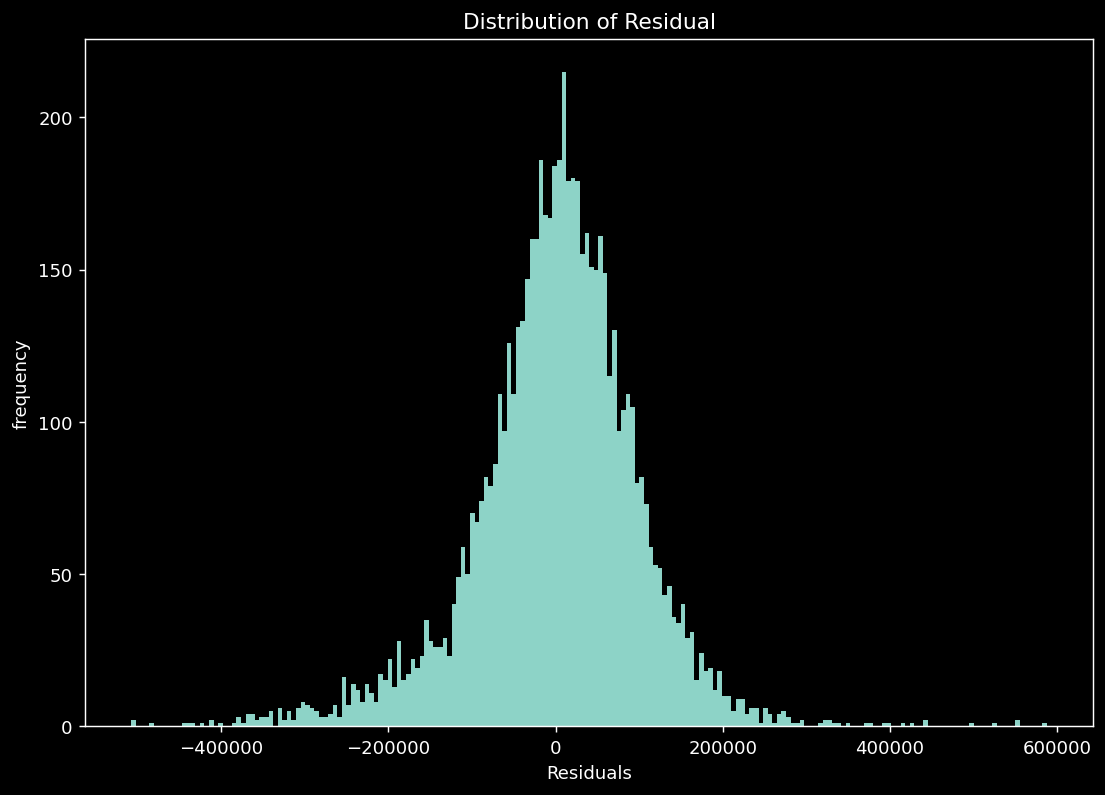

In [19]:
plt.figure(dpi=130, figsize=(10,7))

plt.hist(residual_table['residuals'],bins=200)
plt.xlabel('Residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residual')

# MODEL COEFFICIENTS

In [20]:
coeff_table = pd.DataFrame({'columns': X_train.columns,'coefficients': lr.coef_})
coeff_table = coeff_table.sort_values(by = 'coefficients')

Text(0.5, 1.0, 'Normalized Coefficients plot')

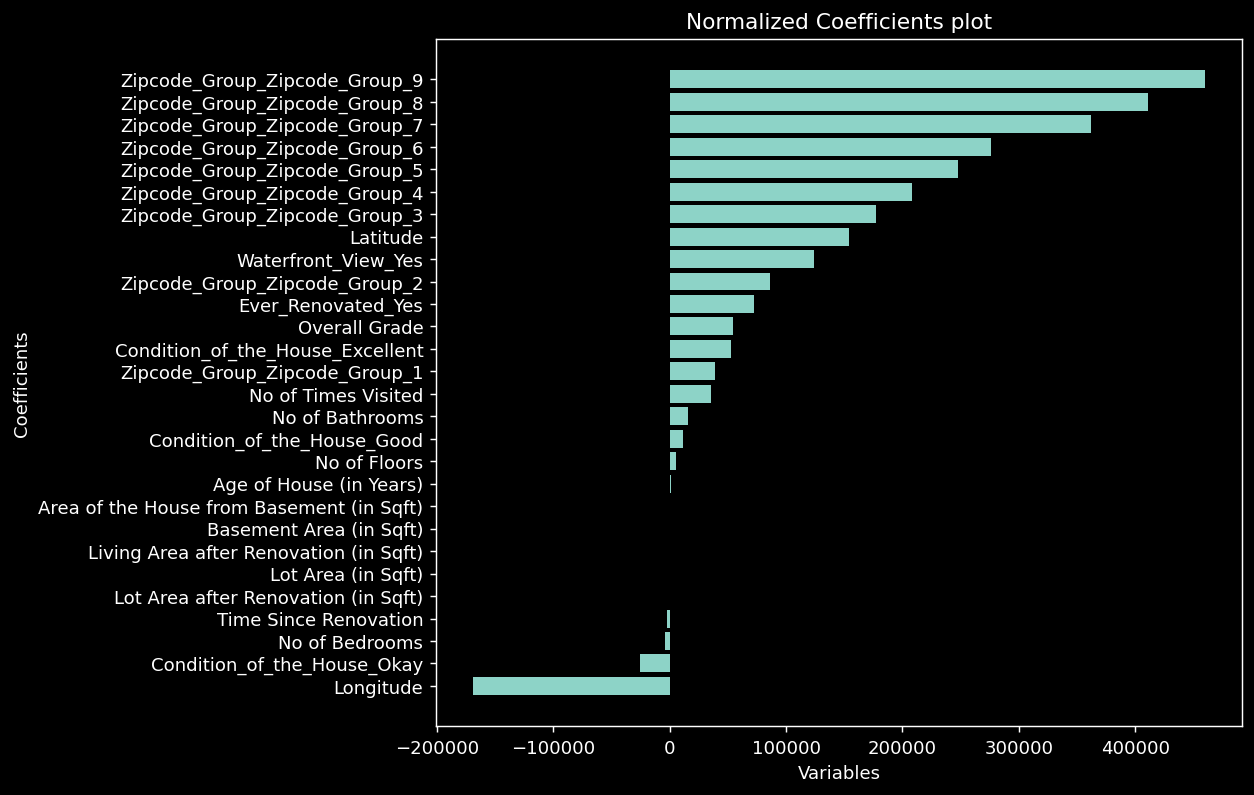

In [21]:
plt.figure(dpi=130, figsize=(8,7))
x=coeff_table['columns']
y=coeff_table['coefficients']
plt.barh(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Normalized Coefficients plot')

# PREDICTOR


In [22]:
values = [3,1,5650,1,0,7,1180,0,63,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
lr.predict(np.array(values).reshape((1,-1)))

array([225081.16890037])